<a href="https://colab.research.google.com/github/DARSSHINI-P/DARSSHINI-P---241801042---FOML/blob/main/DARSSHINI_P_FOML_EXP_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score


In [40]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
file_path="/content/drive/MyDrive/BankNoteAuthentication.csv"
df=pd.read_csv(file_path)
df.head()




,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [42]:

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [43]:


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [44]:

mlp = MLPClassifier(hidden_layer_sizes=(10,10), activation='relu',solver='adam', max_iter=500, early_stopping=True,validation_fraction=0.1, random_state=42)


In [45]:
mlp.fit(X_train, y_train)

MLPClassifier(early_stopping=True, hidden_layer_sizes=(10, 10), max_iter=500,
              random_state=42)

In [46]:
y_pred = mlp.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[151   2]
 [  0 122]]
Accuracy: 0.9927272727272727


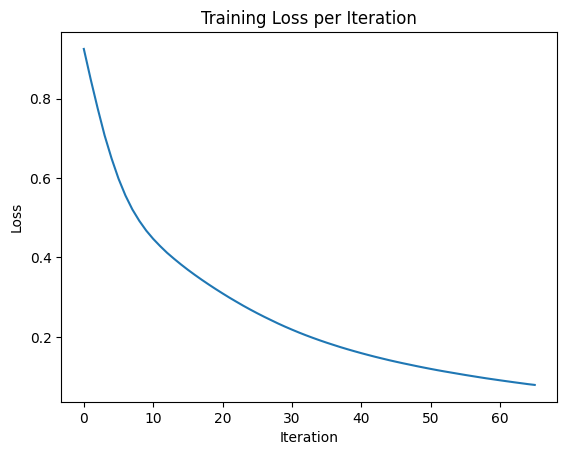

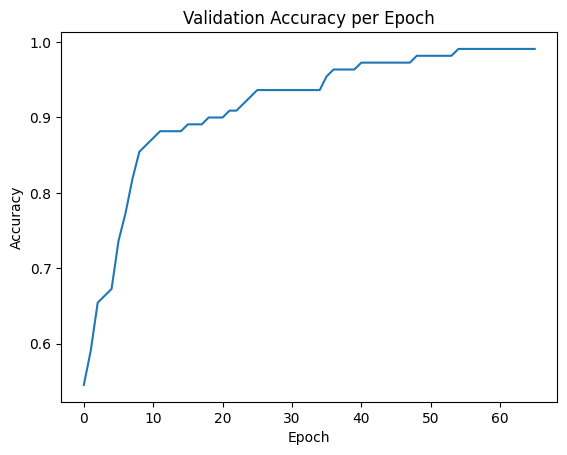

In [47]:
plt.plot(mlp.loss_curve_)
plt.title("Training Loss per Iteration")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()

if hasattr(mlp, "validation_scores_"):
   plt.plot(mlp.validation_scores_)
   plt.title("Validation Accuracy per Epoch")
   plt.xlabel("Epoch")
   plt.ylabel("Accuracy")
   plt.show()



In [48]:
activations = ['tanh', 'logistic', 'identity']

for act in activations:
    model = MLPClassifier(hidden_layer_sizes=(10,10), activation=act,solver='adam',max_iter=500,early_stopping=True,validation_fraction=0.1,random_state=42)


    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\nActivation: {act}")
    print("Accuracy:", accuracy_score(y_test, y_pred))



Activation: tanh
Accuracy: 0.9854545454545455

Activation: logistic
Accuracy: 0.5563636363636364

Activation: identity
Accuracy: 0.9745454545454545
